# K-Nearest Neighbour

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Modules import Cleaner as cl
from Modules import DataSource

# SLOW
dataset = DataSource.fetch('http://notebookserver:5000/api/cars/all','./data/bilhandel_clean.csv')
# FAST
# dataset = cl.get_and_clean_df('./data/bilhandel_clean.csv')
display(dataset)

./data/bilhandel_clean.csv


,Brændstoftype,Gearkasse,Make,Model,Antal døre,Grøn Ejerafgift,Hestekræfter,Kilometer,Km/l,Antal gear,0 - 100 km/t,Nypris,Pris,Tophastighed,Vægt,Årgang
0,Diesel,Manuel,Peugeot,"407 1,6 HDi XR SW",5.0,6540.0,110.0,292000.0,17.9,6.0,13.7,307689.0,14700,189.0,1475.0,2005
2,Diesel,Automatisk,Skoda,"Superb 2,0 TDi 150 Ambition DSG",5.0,3880.0,150.0,243000.0,22.2,6.0,8.9,436000.0,169700,218.0,1400.0,2016
3,Benzin,Automatisk,VW,"Passat 1,4 GTE Variant DSG Van",5.0,660.0,218.0,75000.0,32.3,6.0,7.6,318324.0,2495,225.0,1635.0,2018
4,Benzin,Manuel,Kia,"Rio 1,2 CVVT Collect",5.0,660.0,86.0,107000.0,21.3,5.0,13.1,139998.0,69800,168.0,1158.0,2014
5,Diesel,Manuel,Peugeot,"407 1,6 HDi XR SW",5.0,6540.0,110.0,292000.0,17.9,6.0,13.7,307689.0,14700,189.0,1475.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,Benzin,Manuel,Seat,"Mii 1,0 60 Style eco",5.0,660.0,60.0,156000.0,24.4,5.0,14.4,102402.0,49999,161.0,940.0,2014
19995,Benzin,Automatisk,BMW,"530i 2,0 aut.",4.0,1780.0,252.0,57000.0,18.2,8.0,6.2,662193.0,459900,250.0,1515.0,2018
19996,Benzin,Automatisk,VW,"Polo 1,0 TSi 115 Highline DSG",5.0,1080.0,115.0,5000.0,22.9,7.0,9.5,216117.0,249500,200.0,1090.0,2020
19997,Benzin,Manuel,Skoda,"Octavia 1,2 TSi 105 Ambiente",5.0,1880.0,105.0,156000.0,17.5,6.0,10.8,224002.0,64900,192.0,1170.0,2011


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

X = dataset.loc[:, ['Make','Gearkasse','Model','Kilometer','Årgang','Hestekræfter','Antal døre','Antal gear', 'Km/l', '0 - 100 km/t','Tophastighed','Vægt','Grøn Ejerafgift','Nypris','Pris']].values
y = dataset.loc[:, ['Brændstoftype']].values

le = preprocessing.LabelEncoder()
X[:, 0] = le.fit_transform(X[:,0])
X[:, 1] = le.fit_transform(X[:,1])
X[:, 2] = le.fit_transform(X[:,2])
X[:, 3] = le.fit_transform(X[:,3])

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [14]:
scaled_features = scaler.transform(X)
dataset_features = pd.DataFrame(scaled_features,columns=['Make','Gearkasse','Model','Kilometer','Årgang','Hestekræfter','Antal døre','Antal gear', 'Km/l', '0 - 100 km/t','Tophastighed','Vægt','Grøn Ejerafgift','Nypris','Pris'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)
display(pred)

from sklearn.metrics import classification_report,confusion_matrix
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

array(['Diesel', 'Benzin', 'Benzin', ..., 'Diesel', 'Diesel', 'Diesel'],
      dtype=object)

WITH K=1


[[1903   34    0]
 [  42 1533    0]
 [   1    0   90]]


              precision    recall  f1-score   support

      Benzin       0.98      0.98      0.98      1937
      Diesel       0.98      0.97      0.98      1575
          El       1.00      0.99      0.99        91

    accuracy                           0.98      3603
   macro avg       0.99      0.98      0.98      3603
weighted avg       0.98      0.98      0.98      3603



# Choosing a K Value

In [18]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

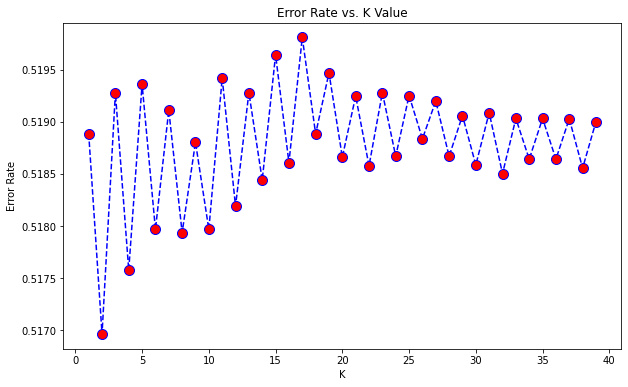

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[1853   83    1]
 [  94 1481    0]
 [   3    0   88]]


              precision    recall  f1-score   support

      Benzin       0.95      0.96      0.95      1937
      Diesel       0.95      0.94      0.94      1575
          El       0.99      0.97      0.98        91

    accuracy                           0.95      3603
   macro avg       0.96      0.95      0.96      3603
weighted avg       0.95      0.95      0.95      3603

